In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
data = pd.read_excel('Data.csv')

In [ ]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      417534 non-null  object        
 1   StockCode    417534 non-null  object        
 2   Description  417534 non-null  object        
 3   Quantity     417534 non-null  int64         
 4   InvoiceDate  417534 non-null  datetime64[ns]
 5   Price        417534 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      417534 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.7+ MB


In [ ]:
data_selec = data[data['Quantity']>=0]
data_selec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407695 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407695 non-null  object        
 1   StockCode    407695 non-null  object        
 2   Description  407695 non-null  object        
 3   Quantity     407695 non-null  int64         
 4   InvoiceDate  407695 non-null  datetime64[ns]
 5   Price        407695 non-null  float64       
 6   Customer ID  407695 non-null  float64       
 7   Country      407695 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.0+ MB


In [ ]:
ces_selec = (data_selec[data_selec['Country'] == 'United Kingdom'].groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Invoice'))

In [ ]:
ces_selec

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,FAIRY CAKE CANDLES,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE DOUBLE PLANTER,ZINC HEART LATTICE PLANTER BOWL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC POLICE BOX LANTERN,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0 
    if x >= 1:
        return 1

In [ ]:
ces_code_selec = ces_selec.applymap(encode_units)

In [ ]:
ces_code_selec

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,FAIRY CAKE CANDLES,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE DOUBLE PLANTER,ZINC HEART LATTICE PLANTER BOWL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC POLICE BOX LANTERN,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ces_fil_selec  = ces_code_selec[(ces_code_selec > 0).sum(axis=1) >= 2]
ces_fil_selec

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,FAIRY CAKE CANDLES,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE DOUBLE PLANTER,ZINC HEART LATTICE PLANTER BOWL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC POLICE BOX LANTERN,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from mlxtend.frequent_patterns import apriori

In [ ]:
freq_prod = apriori(ces_fil_selec, min_support=0.03, use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)
freq_prod['length'] = freq_prod['itemsets'].apply(lambda x: len(x))
freq_prod

,support,itemsets,length
0,0.179578,(WHITE HANGING HEART T-LIGHT HOLDER),1
1,0.092402,(REGENCY CAKESTAND 3 TIER),1
2,0.077842,(ASSORTED COLOUR BIRD ORNAMENT),1
3,0.076784,(STRAWBERRY CERAMIC TRINKET BOX),1
4,0.070500,(HOME BUILDING BLOCK WORD),1
...,...,...,...
86,0.030490,(POTTING SHED TEA MUG),1
87,0.030303,(CREAM CUPID HEARTS COAT HANGER),1
88,0.030241,"(HEART OF WICKER LARGE, HEART OF WICKER SMALL)",2
89,0.030241,(PLASTERS IN TIN SPACEBOY),1


In [ ]:
from mlxtend.frequent_patterns import association_rules

In [ ]:
association_rules(freq_prod, metric='lift', min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE ),0.049095,0.060855,0.033788,0.688213,11.309069,0.030800,3.012136
1,(WOODEN FRAME ANTIQUE WHITE ),(WOODEN PICTURE FRAME WHITE FINISH),0.060855,0.049095,0.033788,0.555215,11.309069,0.030800,2.137898
2,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.047415,0.076784,0.036277,0.765092,9.964175,0.032636,3.930114
3,(STRAWBERRY CERAMIC TRINKET BOX),(SWEETHEART CERAMIC TRINKET BOX),0.076784,0.047415,0.036277,0.472447,9.964175,0.032636,1.805669
4,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.061166,0.052828,0.030241,0.494405,9.358753,0.027010,1.873380
5,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.052828,0.061166,0.030241,0.572438,9.358753,0.027010,2.195785
6,(HOME BUILDING BLOCK WORD),(LOVE BUILDING BLOCK WORD),0.070500,0.057682,0.031921,0.452780,7.849656,0.027854,1.722011
7,(LOVE BUILDING BLOCK WORD),(HOME BUILDING BLOCK WORD),0.057682,0.070500,0.031921,0.553398,7.849656,0.027854,2.081273
8,(WHITE HANGING HEART T-LIGHT HOLDER),(RED HANGING HEART T-LIGHT HOLDER),0.179578,0.058739,0.042934,0.239085,4.070274,0.032386,1.237012
9,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.058739,0.179578,0.042934,0.730932,4.070274,0.032386,3.049127


In [ ]:
rules = association_rules(freq_prod, metric='lift', min_threshold=1)
rules.head

<bound method NDFrame.head of                             antecedents                           consequents  \
0  (WHITE HANGING HEART T-LIGHT HOLDER)    (RED HANGING HEART T-LIGHT HOLDER)   
1    (RED HANGING HEART T-LIGHT HOLDER)  (WHITE HANGING HEART T-LIGHT HOLDER)   
2      (SWEETHEART CERAMIC TRINKET BOX)      (STRAWBERRY CERAMIC TRINKET BOX)   
3      (STRAWBERRY CERAMIC TRINKET BOX)      (SWEETHEART CERAMIC TRINKET BOX)   
4   (WOODEN PICTURE FRAME WHITE FINISH)         (WOODEN FRAME ANTIQUE WHITE )   
5         (WOODEN FRAME ANTIQUE WHITE )   (WOODEN PICTURE FRAME WHITE FINISH)   
6            (HOME BUILDING BLOCK WORD)            (LOVE BUILDING BLOCK WORD)   
7            (LOVE BUILDING BLOCK WORD)            (HOME BUILDING BLOCK WORD)   
8               (HEART OF WICKER LARGE)               (HEART OF WICKER SMALL)   
9               (HEART OF WICKER SMALL)               (HEART OF WICKER LARGE)   

   antecedent support  consequent support   support  confidence       lift  \


In [ ]:
print('Quantidade de associacoes {}'.format(rules.shape[0]))

Quantidade de associacoes 10


Text(0.5, 1.0, 'Confianca')

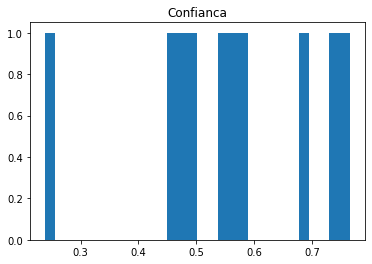

In [ ]:
rules.hist('confidence', grid=False, bins = 30)
plt.title('Confianca')

Text(0.5, 1.0, 'Elevacao')

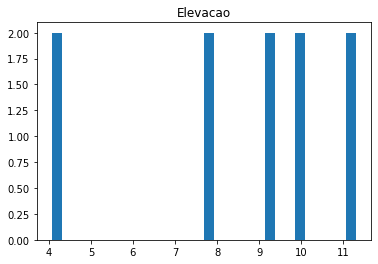

In [ ]:
rules.hist('lift', grid=False, bins = 30)
plt.title('Elevacao')